<a href="https://colab.research.google.com/github/Imeneallouche/Machine-Learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

If your data points will clearly not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.

Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

# **How Does it Work?**

Python has methods for finding a relationship between data-points and to draw a line of polynomial regression.

Example: we have registered 18 cars speed and time of day as they were passing a certain tollbooth.

The x-axis represents the hours of the day and the y-axis represents the speed:


# **STEP 1: Draw the scatter**

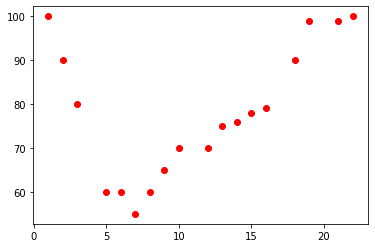

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


day_hours= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
speed = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(day_hours,speed, color="red")
plt.show()

# **STEP 2 : Use NumPy to draw the polynomial regression Line**


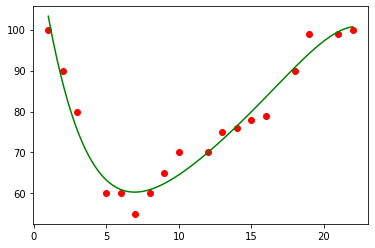

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy


day_hours= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]          #create the x_axis array
speed = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]   #create the y_axis array


mymodel = numpy.poly1d(numpy.polyfit(day_hours, speed,5))           #make the polynomial model with numpy

myline = numpy.linspace(1,22,100)                                   #speficy the displaying of the line (starts at point 1, ends at 22)


plt.scatter(day_hours, speed, color="red")                          #Draw the original scatter
plt.plot(myline, mymodel(myline), color="green")                    #Draw the polynomial line
plt.show()                                                          #Display both in the same diagram

# **R Squared Value**

In order to know whether the polynomial regression model is a fit for our study or not, we should know how well the relationship between x_axis values and y_axis values are.

The relationship is measured with a value called : **R Squared**

***0 < R Suqared < 1:*** R close to 0 => bad relationship R close to 1 => perfect relationship

In [32]:
import numpy
from sklearn.metrics import r2_score

x_axis = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y_axis = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]


coeffs = numpy.polyfit(day_hours,speed,3)                             #numpy.polyfit(1st axis, 2nd axis, nb of elem in array)
print("the coeffs of the polynomial equation: ", coeffs)              #returns the coeffs of the equation in an array

mymodel = numpy.poly1d(coeffs)                                        #numpy.poly1d(array of coeffs)
print("the equation of the polynomial function: \n", mymodel)         #numpy.poly1d([a,b,c])as an example returns ax²+bx+c

print("the relationship between day hours and speed: ",r2_score(y_axis, mymodel(x_axis)))

the coeffs of the polynomial equation:  [-3.03208795e-02  1.34333191e+00 -1.55383039e+01  1.13768037e+02]
the equation of the polynomial function: 
           3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8
the relationship between day hours and speed:  0.9432150416451025


# **Predict future values**
Thanks to the polynomial equation and the close to 1 value of R squared, we now can predict future values using the **mymodel** function as follows:

In [31]:
from sklearn.metrics import r2_score
import numpy

x_axis = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y_axis = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x_axis,y_axis,5))

hour_to_predict=input("what is the hour you wanna predict its result: ")
speed_predicted=mymodel(float(hour_to_predict))
print("here is the average speed: ", speed_predicted)

what is the hour you wanna predict its result: 17.69
here is the average speed:  89.6340011534378


# **Bad Fit example for polynomial regression**



bad relationship:  0.1526912647033184


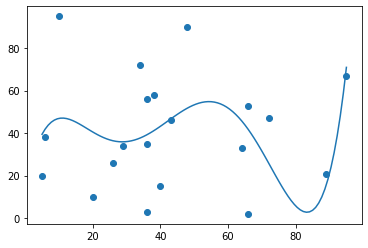

In [50]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score
%matplotlib inline

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x,y,5))
myline = numpy.linspace(5,95,100)

print("bad relationship: ", r2_score(y,mymodel(x)))
plt.scatter(x,y)
plt.plot(myline, mymodel(myline))
plt.show()